In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/CLIP Project

Mounted at /gdrive
/gdrive/My Drive/CLIP Project


In [2]:
import os
import cv2
import gc
import math
import numpy as np
import pandas as pd
import itertools
from tqdm import tqdm
import albumentations as A
import matplotlib.pyplot as plt
from operator import itemgetter

In [3]:
df_train_captions = pd.read_csv('Train/caption_prediction_train.csv', sep='\t')
df_train_concepts = pd.read_csv('Train/concept_detection_train.csv', sep='\t')
df_concepts = pd.read_csv('Train/concepts.csv', sep='\t')

In [4]:
concept_count = {}
max_num = 0

for train_id, caption_train_row in df_train_concepts.iterrows():
  cuis = caption_train_row['cuis'].split(';')
  max_num = max(max_num, len(cuis))
  for cui in cuis:
    concept_name = cui
    if concept_name in concept_count:
      concept_count[concept_name] += 1
    else:
      concept_count[concept_name] = 1

concept_name_count = {}
for concept in concept_count:
  concept_name = df_concepts.loc[df_concepts['concept'] == concept, 'concept_name'].iloc[0]
  concept_name_count[concept_name] = concept_count[concept]

print('Most number of concepts:', max_num)
print('Number of concepts:', len(concept_name_count.keys()))
print('Average number of concepts:', sum(concept_name_count.values()) / len(df_train_concepts))

Most number of concepts: 50
Number of concepts: 8374
Average number of concepts: 4.748820174121885


{'X-Ray Computed Tomography': 25989, 'Plain x-ray': 24389, 'Magnetic Resonance Imaging': 14622, 'Ultrasonography': 11147, 'Chest': 7720}
{'Dysbarism': 2, 'Gene Delivery Systems': 3, 'Cryptotia': 3, 'Structure of ganglion impar': 3, 'Unroofed coronary sinus': 3}


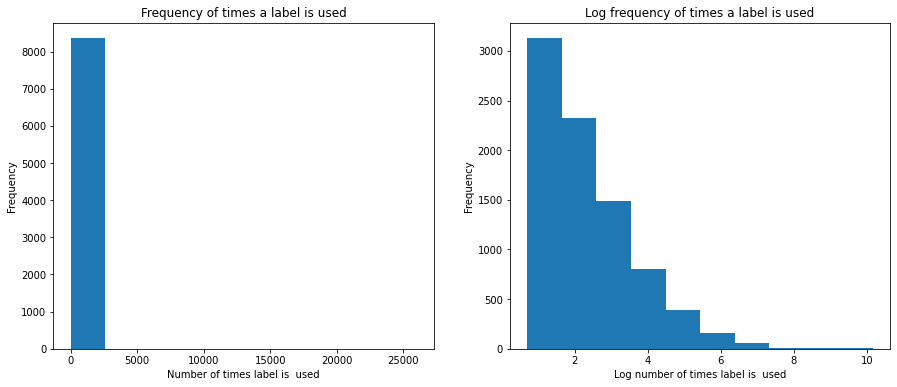

In [5]:
top_5_concepts = dict(sorted(concept_name_count.items(), key = itemgetter(1), reverse = True)[:5])
last_5_concepts = dict(sorted(concept_name_count.items(), key = itemgetter(1), reverse = False)[:5])
print(top_5_concepts)
print(last_5_concepts)

log_values = np.log(list(concept_name_count.values()))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.hist(concept_name_count.values())
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Number of times label is  used')
ax1.set_title('Frequency of times a label is used')

ax2.hist(log_values)
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Log number of times label is  used')
ax2.set_title('Log frequency of times a label is used')
plt.show() 

Looks like most labels are unly used a low number of times

The most common number of words is {12: 3693, 11: 3675, 9: 3545, 13: 3533, 10: 3478}
The most amount tokens in a words is 410
The least amount tokens in a words is 1
Number of words with more than 30 tokens: 14116
Number of words with more than 1 tokens: 194


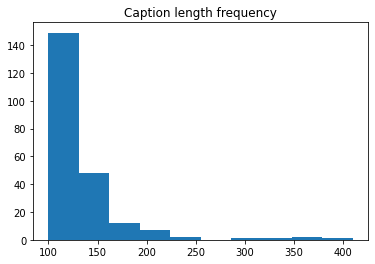

In [6]:
token_count = {}
tokens_list = []
max_cap = 30
min_cap = 1
max_counter = 0
min_counter = 0

for id, row in df_train_captions.iterrows():
  num_of_tokens = len(row['caption'].split(' '))
  if num_of_tokens >= 100:
    tokens_list.append(num_of_tokens)
  if num_of_tokens in token_count.keys():
    token_count[num_of_tokens] += 1
  else:
    token_count[num_of_tokens] = 1
  if num_of_tokens >= max_cap:
    max_counter += 1
  elif num_of_tokens <= min_cap:
    min_counter += 1

most_common_length = dict(sorted(token_count.items(), key = itemgetter(1), reverse = True)[:5])
most_tokens = max(token_count.keys())
least_tokens = min(token_count.keys())

print('The most common number of words is', most_common_length)
print('The most amount tokens in a words is', most_tokens)
print('The least amount tokens in a words is', least_tokens)
print(f'Number of words with more than {max_cap} tokens: {max_counter}')
print(f'Number of words with more than {min_cap} tokens: {min_counter}')

plt.hist(tokens_list)
plt.title('Caption length frequency')
plt.show()